# Attrition rate case study

Increasing employee attrition rate is posing as a serious threat to software 
companies in USA. One of our clients who is facing a similar issue, has 
reached out to us to provide a solution for this, by employing Analytics and 
Machine Learning. The client has provided a historical Attrition dataset that 
has the following information about their employees
• Demographic information 
• Information on Salary and Travel requisites
• Employment information
• Target variable: Attrition
As a Data Scientist, you are expected to help the company with the following
1. Identify the Key factors influencing attrition behavior
2. Build a ML model to predict employees who are more likely to leave
3. Present your findings
4. Exploratory Analysis & Insights on factors influencing attrition
5. ML Model Outcomes– Accuracy, Precision & Recall
6. Scored Results

In [1]:
import pandas as pd
import numpy as np

In [2]:
#defining the dataframe as "df"
df=pd.read_csv("C:\\Users\\swapnil8251\\Desktop\\DATA SCIENCE AND MACHINE LEARNING\\CAPSTON PROJECT\\MACHINE LEARNING PROJECT\\ATTRITION RATE CASE STUDY\\Employee Attrition.csv")

In [3]:
pd.options.display.max_columns=None
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
#Checking out the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [6]:
# splitting features and the target variable
# consider all the columns except 'Attrition' using 'iloc'
df_features = df.iloc[:, df.columns != 'Attrition']

# consider the target variable
df_target = df.iloc[:, df.columns == 'Attrition']

# df_features.shape,df_target.shape

In [7]:
df_features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


In [8]:
#From features it is seen that, columns with object data type  EnvironmentSatisfaction, JobInvolvement,
#JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance are ordinal.
#We need to convert them into  with ordinal values.

In [9]:
df_features["Education"].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [10]:
col=["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]
for x in col:
    print(x, df_features[x].value_counts())

EnvironmentSatisfaction High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64
JobSatisfaction Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64
PerformanceRating Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64
RelationshipSatisfaction High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64
WorkLifeBalance Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64


In [11]:
df_features["EnvironmentSatisfaction"]=df_features["EnvironmentSatisfaction"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
df_features["JobInvolvement"]=df_features["JobInvolvement"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
df_features["JobSatisfaction"]=df_features["JobSatisfaction"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
df_features["PerformanceRating"]=df_features["PerformanceRating"].replace({'Excellent':0,'Outstanding':1})
df_features["RelationshipSatisfaction"]=df_features["RelationshipSatisfaction"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
df_features["WorkLifeBalance"]=df_features["WorkLifeBalance"].replace({'Bad':0,'Good':1,'Better':2,'Best':3})

<ipython-input-11-546a1bede80d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["EnvironmentSatisfaction"]=df_features["EnvironmentSatisfaction"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
<ipython-input-11-546a1bede80d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["JobInvolvement"]=df_features["JobInvolvement"].replace({'Low':0,'Medium':1,'High':2,'Very High':3})
<ipython-input-11-546a1bede80d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [12]:
df_features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,1,Female,94,2,2,Sales Executive,3,Single,5993,19479,8,Y,Yes,11,0,0,80,0,8,0,0,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,2,Male,61,1,2,Research Scientist,1,Married,5130,24907,1,Y,No,23,1,3,80,1,10,3,2,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,3,Male,92,1,1,Laboratory Technician,2,Single,2090,2396,6,Y,Yes,15,0,1,80,0,7,3,2,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,3,Female,56,2,1,Research Scientist,2,Married,2909,23159,1,Y,Yes,11,0,2,80,0,8,3,2,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,0,Male,40,2,1,Laboratory Technician,1,Married,3468,16632,9,Y,No,12,0,3,80,1,6,3,2,2,2,2,2


In [13]:
#Lets make the above columns in integer form for our ease.
col=["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]
for x in col:
    df_features[x]=df_features[x].astype(int)

<ipython-input-13-8e5f658f24b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[x]=df_features[x].astype(int)


In [14]:
df_features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,1,Female,94,2,2,Sales Executive,3,Single,5993,19479,8,Y,Yes,11,0,0,80,0,8,0,0,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,2,Male,61,1,2,Research Scientist,1,Married,5130,24907,1,Y,No,23,1,3,80,1,10,3,2,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,3,Male,92,1,1,Laboratory Technician,2,Single,2090,2396,6,Y,Yes,15,0,1,80,0,7,3,2,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,3,Female,56,2,1,Research Scientist,2,Married,2909,23159,1,Y,Yes,11,0,2,80,0,8,3,2,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,0,Male,40,2,1,Laboratory Technician,1,Married,3468,16632,9,Y,No,12,0,3,80,1,6,3,2,2,2,2,2


In [15]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   object
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int32 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int32 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [16]:
df_features.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [17]:
#We should also need a label encoding for feature 'BusinessTravel" as follows.
df_features["BusinessTravel"]=df_features["BusinessTravel"].replace({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})

<ipython-input-17-edd7b6852011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["BusinessTravel"]=df_features["BusinessTravel"].replace({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})


In [18]:
df_features.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [19]:
df_features.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [20]:
df_features.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [21]:
df_features.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [22]:
df_features.shape

(1470, 34)

In [23]:
#Usually the job role ultimately describes the emplyoees educational field.
#Also no use of employee count and employee number.
#Also std. hours for all employees are 80.
#So lets discard the educational field from dataset.
df_features=df_features.drop(['EducationField',"EmployeeCount","EmployeeNumber",'StandardHours','Age','JobLevel','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','PercentSalaryHike'], axis=1)

In [24]:
df_features.shape

(1470, 22)

In [25]:
df_features.shape

(1470, 22)

In [26]:
corr02=df_features.corr()

In [27]:
corr02

,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
BusinessTravel,1.000000,-0.004086,-0.024469,0.004174,0.026528,0.039062,-0.033962,0.034319,-0.014107,0.020875,-0.035986,-0.016727,0.015240,-0.011256,-0.032591
DailyRate,-0.004086,1.000000,-0.004985,0.018355,0.023381,0.046135,0.030571,0.007707,-0.032182,0.038153,0.007846,0.042143,0.002453,-0.037848,-0.033229
DistanceFromHome,-0.024469,-0.004985,1.000000,-0.016075,0.031131,0.008783,-0.003669,-0.017014,0.027473,-0.029251,0.006557,0.044872,-0.036942,-0.026556,0.010029
EnvironmentSatisfaction,0.004174,0.018355,-0.016075,1.000000,-0.049857,-0.008278,-0.006784,-0.006259,0.037600,0.012594,0.007665,0.003432,-0.019359,0.027627,0.016194
HourlyRate,0.026528,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.071335,-0.015794,-0.015297,0.022157,0.001330,0.050263,-0.008548,-0.004607,-0.026716
JobInvolvement,0.039062,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.021476,-0.015271,-0.016322,0.015012,0.034297,0.021523,-0.015338,-0.014617,-0.024184
JobSatisfaction,-0.033962,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,1.000000,-0.007157,0.000644,-0.055699,-0.012454,0.010690,-0.005779,-0.019459,-0.018214
MonthlyIncome,0.034319,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,-0.007157,1.000000,0.034814,0.149515,0.025873,0.005408,-0.021736,0.030683,0.344978
MonthlyRate,-0.014107,-0.032182,0.027473,0.037600,-0.015297,-0.016322,0.000644,0.034814,1.000000,0.017521,-0.004085,-0.034323,0.001467,0.007963,0.001567
NumCompaniesWorked,0.020875,0.038153,-0.029251,0.012594,0.022157,0.015012,-0.055699,0.149515,0.017521,1.000000,0.052733,0.030075,-0.066054,-0.008366,-0.036814


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

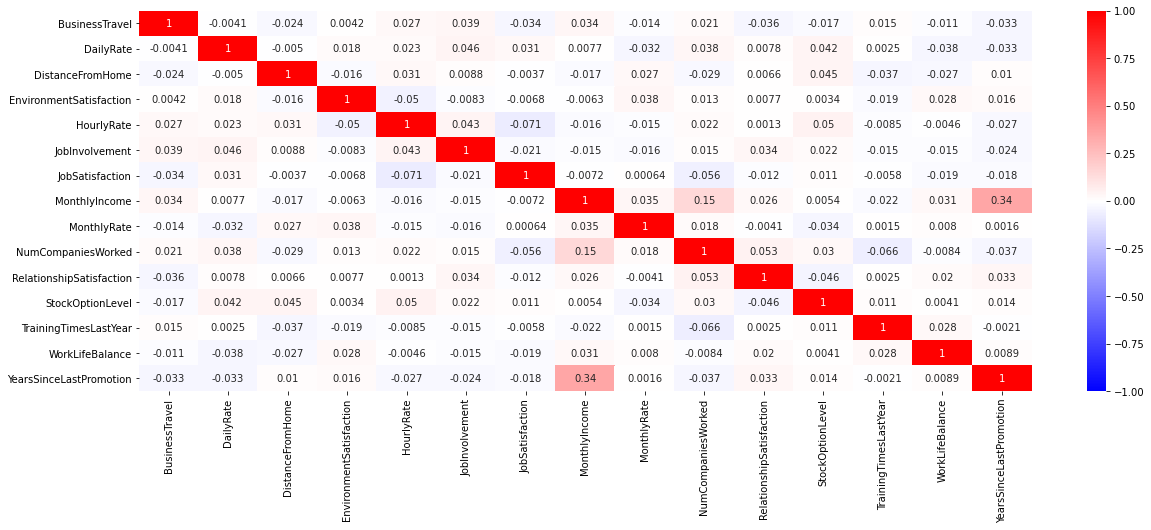

In [29]:
plt.figure(figsize = (20,7))
sns.heatmap(corr02, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 10})
plt.show()

In [30]:
df_features.shape

(1470, 22)

In [31]:
#from correlation matrix it is seen that percent sallary hike and performance rating are highly correlated.
#Also job level and total years of experince is highly correlated.
#Lets redunt one of them.
#df_features=df_features.drop(['Age','JobLevel','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','PercentSalaryHike'], axis=1, inplace=True)

In [32]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   BusinessTravel            1470 non-null   int64 
 1   DailyRate                 1470 non-null   int64 
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int32 
 6   Gender                    1470 non-null   object
 7   HourlyRate                1470 non-null   int64 
 8   JobInvolvement            1470 non-null   int32 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int32 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  NumCompaniesWorked      

In [33]:
df_features.shape

(1470, 22)

In [34]:
#segregating of categorical and numerical columns for our ease of EDA.
df_cat=df_features.select_dtypes(include=object)
df_num=df_features.select_dtypes(include=np.number)

In [35]:
df_num.head()

,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,2,1102,1,1,94,2,3,5993,19479,8,0,0,0,0,0
1,1,279,8,2,61,1,1,5130,24907,1,3,1,3,2,1
2,2,1373,2,3,92,1,2,2090,2396,6,1,0,3,2,0
3,1,1392,3,3,56,2,2,2909,23159,1,2,0,3,2,3
4,2,591,2,0,40,2,1,3468,16632,9,3,1,3,2,2


In [36]:
df_cat.head()

,Department,Education,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Sales,College,Female,Sales Executive,Single,Y,Yes
1,Research & Development,Below College,Male,Research Scientist,Married,Y,No
2,Research & Development,College,Male,Laboratory Technician,Single,Y,Yes
3,Research & Development,Master,Female,Research Scientist,Married,Y,Yes
4,Research & Development,Below College,Male,Laboratory Technician,Married,Y,No


In [37]:
#one hot encoding
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [38]:
df_cat_dummies.shape

(1470, 18)

In [39]:
df_num.shape

(1470, 15)

C:\Users\swapnil8251\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\swapnil8251\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\swapnil8251\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\swap

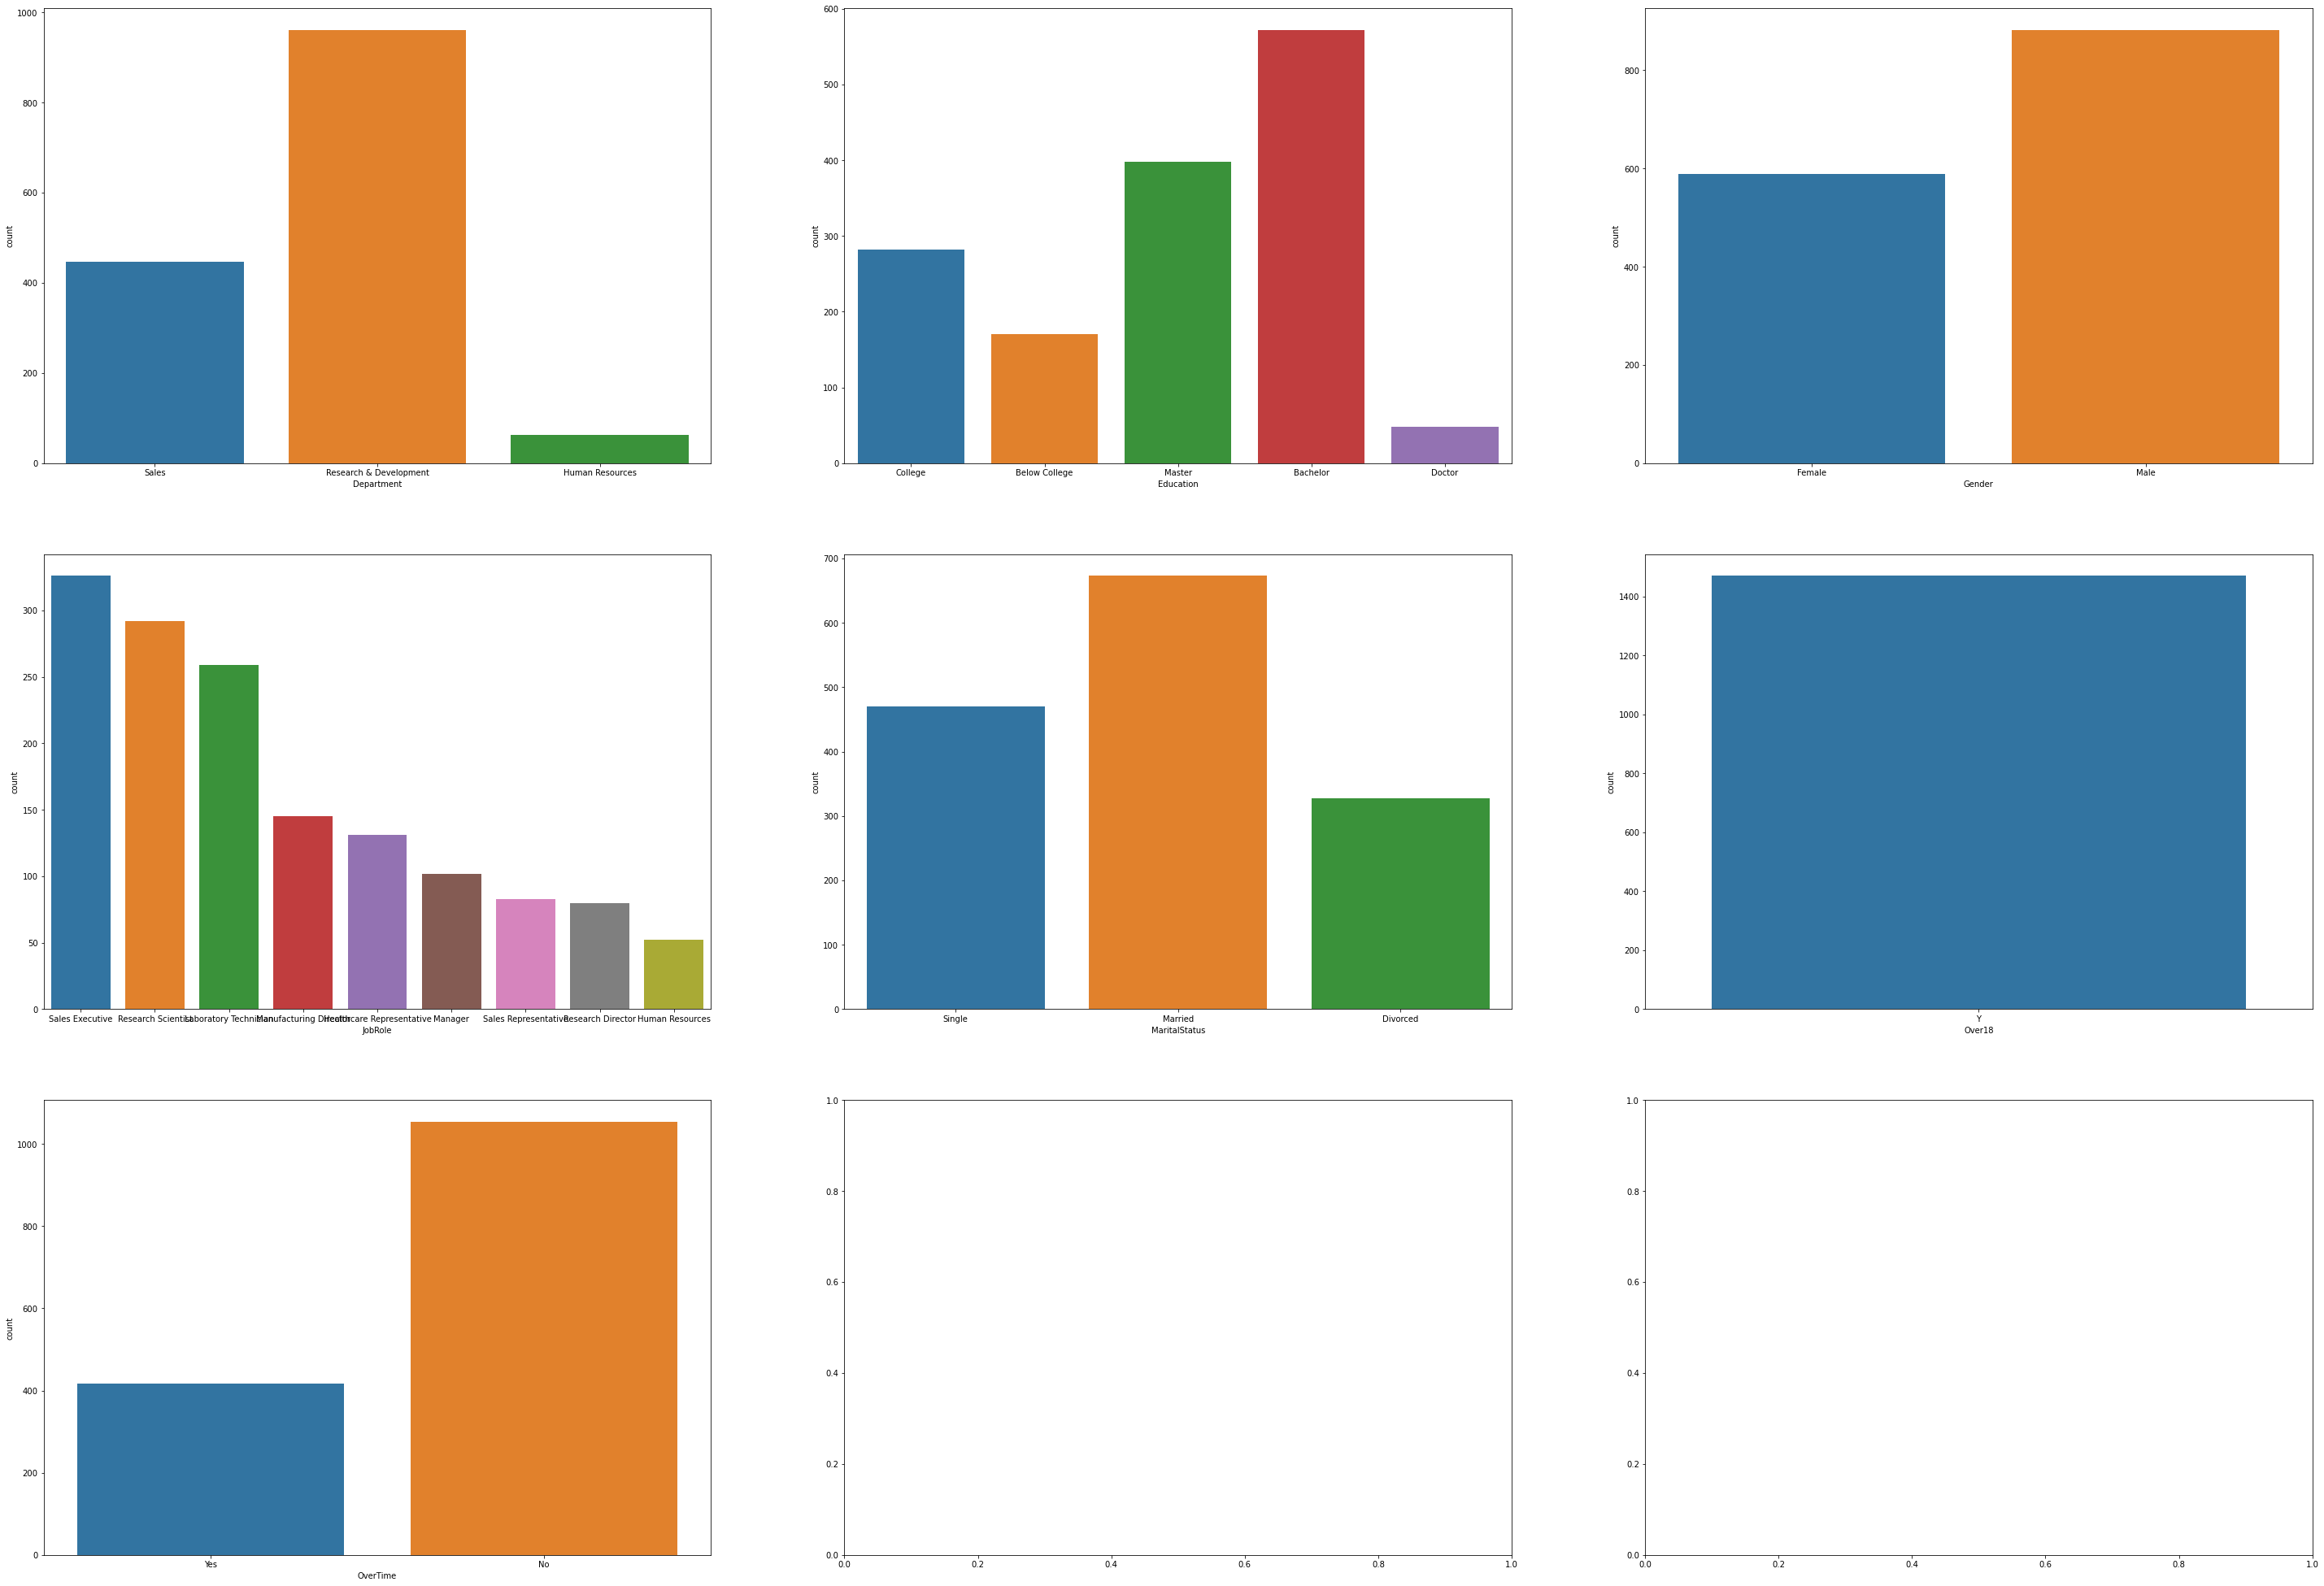

In [40]:
from pandas.api.types import is_string_dtype
categorical=[]

# check the data type of each variable
for column in df_cat:

    # check if the variable has the categorical type 
    if is_string_dtype(df_cat[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_cat[variable], ax = subplot)
    
# display the plot
plt.show()

In [41]:
#Selecting various columns for pair plot
#columns= ["MonthlyIncome",  "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
#sns.pairplot(df_features[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
#plt.show()

In [42]:
#Concatenation
df_x = pd.concat([df_cat_dummies, df_num], axis=1)
df_x.head()

,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,1102,1,1,94,2,3,5993,19479,8,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,279,8,2,61,1,1,5130,24907,1,3,1,3,2,1
2,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,2,1373,2,3,92,1,2,2090,2396,6,1,0,3,2,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1392,3,3,56,2,2,2909,23159,1,2,0,3,2,3
4,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,2,591,2,0,40,2,1,3468,16632,9,3,1,3,2,2


In [43]:
#In above dataframe, the few of the features are in different range other than the 0 to 1.
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()

In [45]:
scaler.fit(df_x)

MinMaxScaler()

In [46]:
df_x=scaler.fit_transform(df_x)

In [47]:
df_x

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.66666667,
        0.06666667],
       [1.        , 0.        , 0.        , ..., 0.5       , 0.66666667,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.06666667]])

In [48]:
df_x.shape

(1470, 33)

In [49]:
df_target.value_counts()

Attrition
No           1233
Yes           237
dtype: int64

In [50]:
df_target["Attrition"]=df_target["Attrition"].replace({'No':0,'Yes':1})

<ipython-input-50-19d6f1180c16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["Attrition"]=df_target["Attrition"].replace({'No':0,'Yes':1})


In [51]:
X=df_x
y = pd.DataFrame(df_target)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [54]:
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1029, 33)
The shape of X_test is: (441, 33)
The shape of y_train is: (1029, 1)
The shape of y_test is: (441, 1)


In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)

In [56]:
y_pred = decision_tree_model.predict(X_test)

In [57]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [58]:
y_test

,Attrition
1291,1
1153,1
720,1
763,0
976,0
...,...
1398,0
351,0
41,0
1210,0


In [59]:
from sklearn import metrics

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [61]:
confusion_matrix(y_test,y_pred)

array([[314,  50],
       [ 48,  29]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       364
           1       0.37      0.38      0.37        77

    accuracy                           0.78       441
   macro avg       0.62      0.62      0.62       441
weighted avg       0.78      0.78      0.78       441



In [63]:
#SGD classifier
from sklearn.linear_model import SGDClassifier
log_reg=SGDClassifier()

In [64]:
log_reg.fit(X_train,y_train)

C:\Users\swapnil8251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier()

In [65]:
y_pred_log=log_reg.predict(X_test)

In [66]:
y_pred_log

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
confusion_matrix(y_test,y_pred_log)

array([[351,  13],
       [ 60,  17]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       364
           1       0.57      0.22      0.32        77

    accuracy                           0.83       441
   macro avg       0.71      0.59      0.61       441
weighted avg       0.80      0.83      0.80       441



In [69]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [70]:
sprtvec=LinearSVC()

In [71]:
sprtvec.fit(X_train,y_train)
y_pred_SVC=sprtvec.predict(X_test)

C:\Users\swapnil8251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
y_pred_SVC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
confusion_matrix(y_test,y_pred_SVC)

array([[357,   7],
       [ 63,  14]], dtype=int64)

In [74]:
support_vector_result=print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       364
           1       0.67      0.18      0.29        77

    accuracy                           0.84       441
   macro avg       0.76      0.58      0.60       441
weighted avg       0.82      0.84      0.80       441

